<a href="https://colab.research.google.com/github/NanzibaBasnin/HCI-Integrated-Gesture-Recognition/blob/main/VGG16_BSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip BSL_1.zip

Streaming output truncated to the last 5000 lines.
  inflating: BSL_1/Train/27/27_132.png  
  inflating: BSL_1/Train/27/27_133.png  
  inflating: BSL_1/Train/27/27_134.png  
  inflating: BSL_1/Train/27/27_135.png  
  inflating: BSL_1/Train/27/27_136.png  
  inflating: BSL_1/Train/27/27_137.png  
  inflating: BSL_1/Train/27/27_138.png  
  inflating: BSL_1/Train/27/27_139.png  
  inflating: BSL_1/Train/27/27_140.png  
  inflating: BSL_1/Train/27/27_141.png  
  inflating: BSL_1/Train/27/27_142.png  
  inflating: BSL_1/Train/27/27_143.png  
  inflating: BSL_1/Train/27/27_144.png  
  inflating: BSL_1/Train/27/27_145.png  
  inflating: BSL_1/Train/27/27_146.png  
  inflating: BSL_1/Train/27/27_147.png  
  inflating: BSL_1/Train/27/27_148.png  
  inflating: BSL_1/Train/27/27_149.png  
  inflating: BSL_1/Train/27/27_150.png  
  inflating: BSL_1/Train/27/27_151.png  
  inflating: BSL_1/Train/27/27_152.png  
  inflating: BSL_1/Train/27/27_153.png  
  inflating: BSL_1/Train/27/27_154.png  
  infl

In [ ]:
!cp -r path/to/conten/ gdrive/ path/to/colab_data_dir

cp: target 'path/to/colab_data_dir' is not a directory


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_data_dir = 'BSL_1/Train'
validation_data_dir = 'BSL_1/Test'

Using TensorFlow backend.


In [ ]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 60
img_cols = 60

#Loads the VGG16 model
vgg16 = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# Let's print our layers
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [ ]:
num_classes = 36


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 10795 images belonging to 36 classes.
Found 2880 images belonging to 36 classes.


In [ ]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 60
img_cols = 60

# Re-loads the VGG16 model without the top or FC layers
vgg16 = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg16.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
def addTopModel(bottom_model, num_classes, D=256):
   # """creates the top or head of the model that will be
    #placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model



FC_Head = addTopModel(vgg16, num_classes)

model = Model(inputs=vgg16.input, outputs=FC_Head)

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 60, 60, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 60, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 60, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 30, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 30, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 15, 15, 128)       0   

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

batch_size = 16


from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint("VGG16_BSL_DS3.h5",
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 10,
                          verbose = 0,
                          restore_best_weights = True,
                          mode="max")

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.1, patience = 7, verbose = 1, min_delta = 1e-4, mode="max")

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate
# we put our call backs into a callback list
#callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate
#sgd = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
nb_train_samples = 10795
nb_validation_samples = 2880
epochs = 1000


# Note we use a very small learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])


#model.save("VGG16_BSL_DS.h5")



history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

model.save("VGG16_BSL_DS3.h5")


from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

#model.save('./gdrive/My Drive/VGG16_BSL_DS.h5')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)



score = model.evaluate(validation_generator, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


#sgd = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

#score, acc = model.evaluate(validation_generator,
                            #batch_size= 16)
#print('Test score:', score)
#print('Test accuracy:', acc)
#model.fit(validation_generator, epochs = 1,batch_size=16)
scores = model.evaluate( validation_generator, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1000
674/674 [==============================] - 429s 636ms/step - loss: 2.4359 - accuracy: 0.3488 - val_loss: 3.5188 - val_accuracy: 0.4194

Epoch 00001: val_accuracy improved from -inf to 0.41944, saving model to VGG16_BSL_DS3.h5
Epoch 2/1000
674/674 [==============================] - 428s 635ms/step - loss: 1.5209 - accuracy: 0.5687 - val_loss: 1.7154 - val_accuracy: 0.4139

Epoch 00002: val_accuracy did not improve from 0.41944
Epoch 3/1000
674/674 [==============================] - 431s 639ms/step - loss: 1.2067 - accuracy: 0.6502 - val_loss: 4.1374 - val_accuracy: 0.4700

Epoch 00003: val_accuracy improved from 0.41944 to 0.47000, saving model to VGG16_BSL_DS3.h5
Epoch 4/1000
674/674 [==============================] - 427s 633ms/step - loss: 1.0163 - accuracy: 0.6965 - val_loss: 0.1699 - val_accuracy: 0.5522

Epoch 00004: val_accuracy improved from 0.47000 to 0.55222, saving model to VGG16_BSL_DS3.h5
Epoch 5/1000
674/674 [==============================] - 431s 639ms/step -

ValueError: ignored

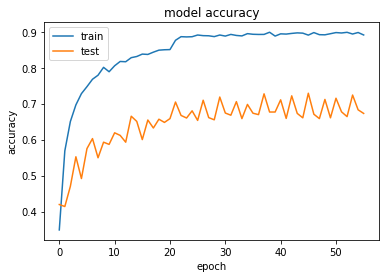

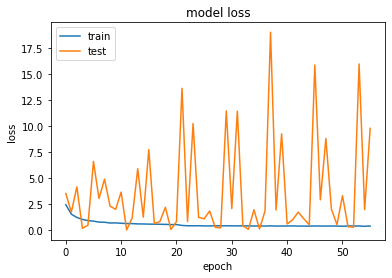

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()